# Area plots, Histogram, and Bar charts

## Objectives

- Create and customize
  1. Aera plot
  2. Histogram
  3. Bar charts on a dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot') #for gg-plot like style

In this project, we will focus on the Canadian Immigration data and use the **already cleaned dataset** and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.<br><br>

In [6]:
file = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df = pd.read_csv(file)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [8]:
print(df.shape)

(195, 39)


In [9]:
df.set_index('Country', inplace = True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [10]:
df.shape

(195, 38)

In [11]:
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Area Plots

In the last project (Intoducrion to Matplotlib and Line Plots) we have created a line plot that visualized top 5 countries that contributed the most immigrants to Cnada from 1980 to 2013. With a little modification to this code wqe can visualize this plot as cumulative plot, also known as a **Stacked Line Plot** or **Area plot**.

Area plots are stacked by default. And to produce a stacked area plot, each column must be either positive or all negative values (any null/NaN values will deault to 0). To produce an unstacked plot, set parameter `stacked` to value `False`.

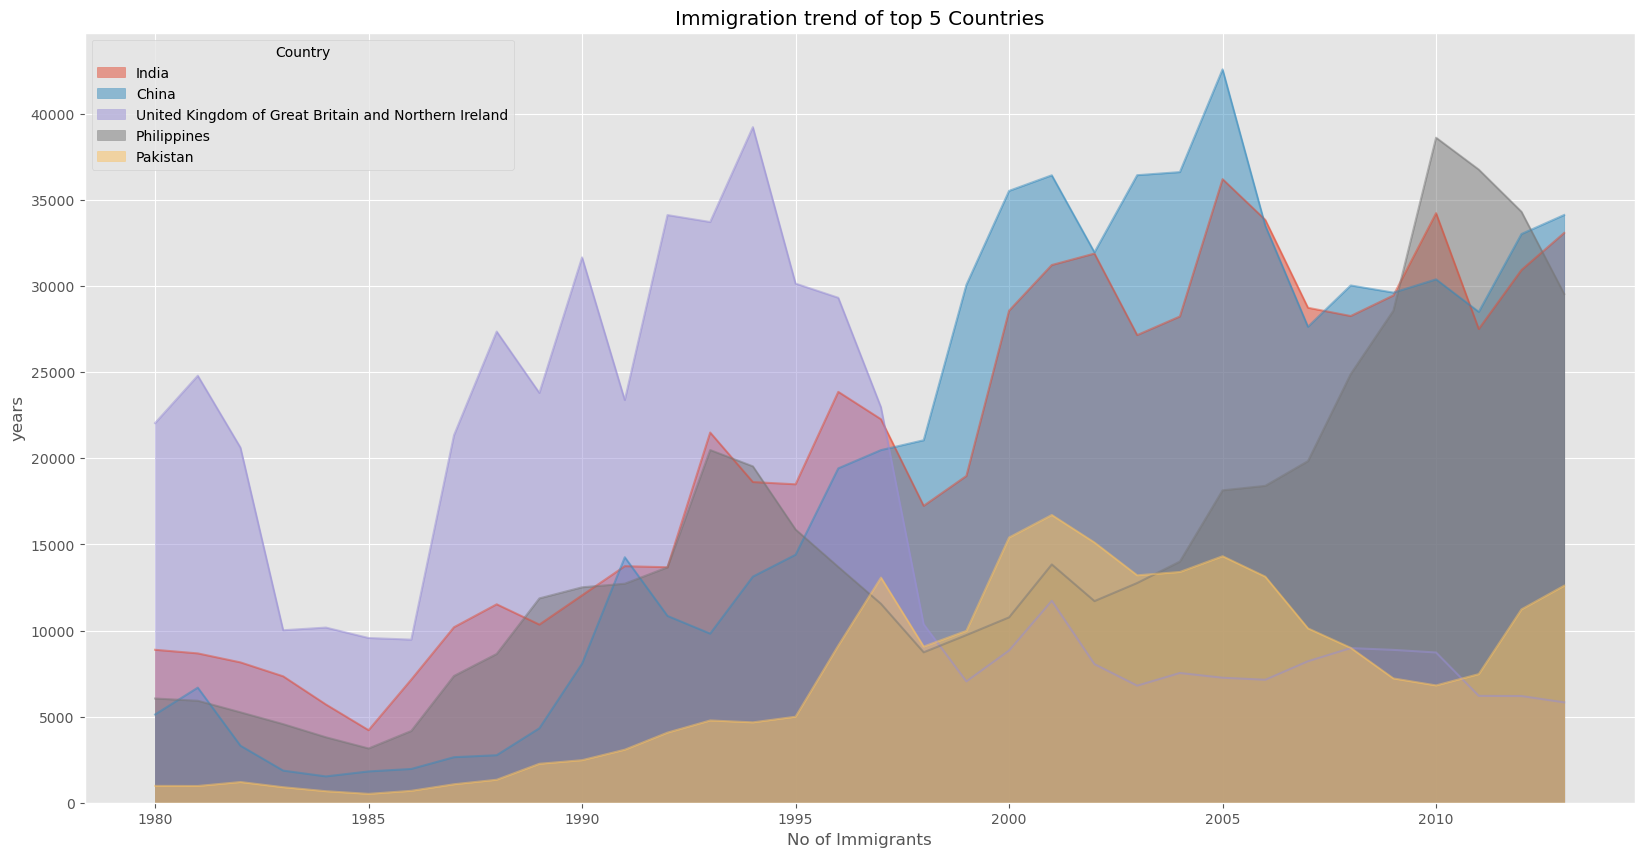

In [12]:
df.sort_values('Total', ascending = False, inplace = True, axis = 0)
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose()

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'area', stacked = False, figsize = (20,10))

plt.title('Immigration trend of top 5 Countries')
plt.xlabel('No of Immigrants')
plt.ylabel('years')

plt.show()

 The unstacked plot has a default transperancy (alpha value) at 0.5. We can modify thgis value by passing in the `alpha` parameter 

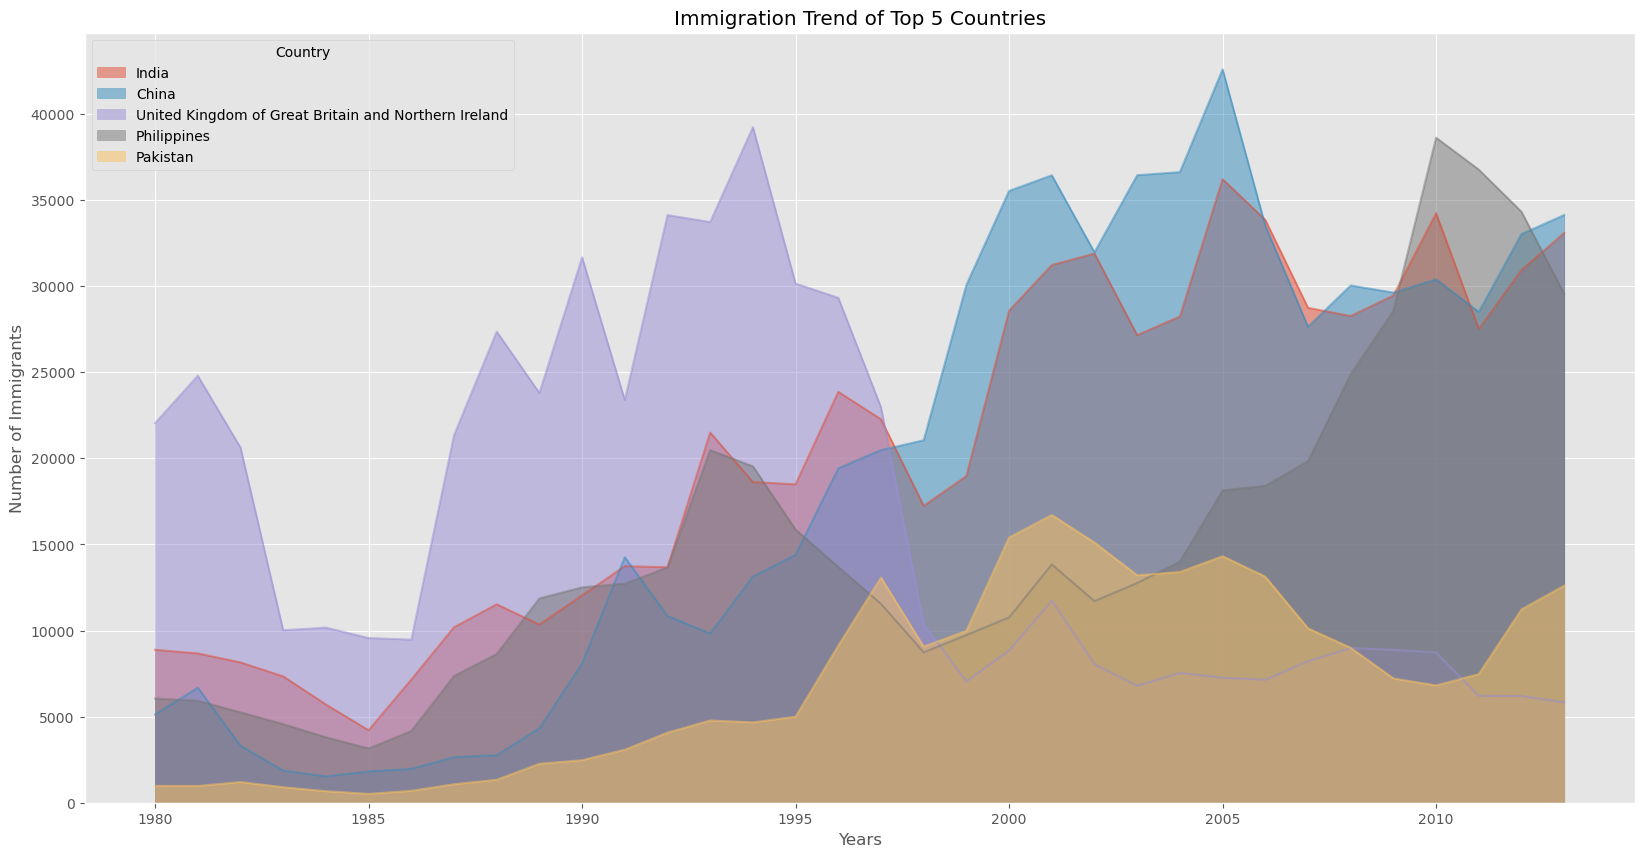

In [13]:
df_top5.plot(kind = 'area', alpha = 0.5, stacked = False, figsize = (20,10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Two types of plotting

There are two styles/options of plotting with `matplotlib`, plotting using the artist layer and plotting using the scripting layer.

##### Option 1 - Scripting layer (Procedural method) - using matplotlib.pyplot as plt

We can use `plt` that is `matplotlib.pyplot` and add more elements bgy calling diffeent methods procedurally, for example, `plt.title(...)` to add title or `plt.xlabel(....)` to add label to the x-axis.

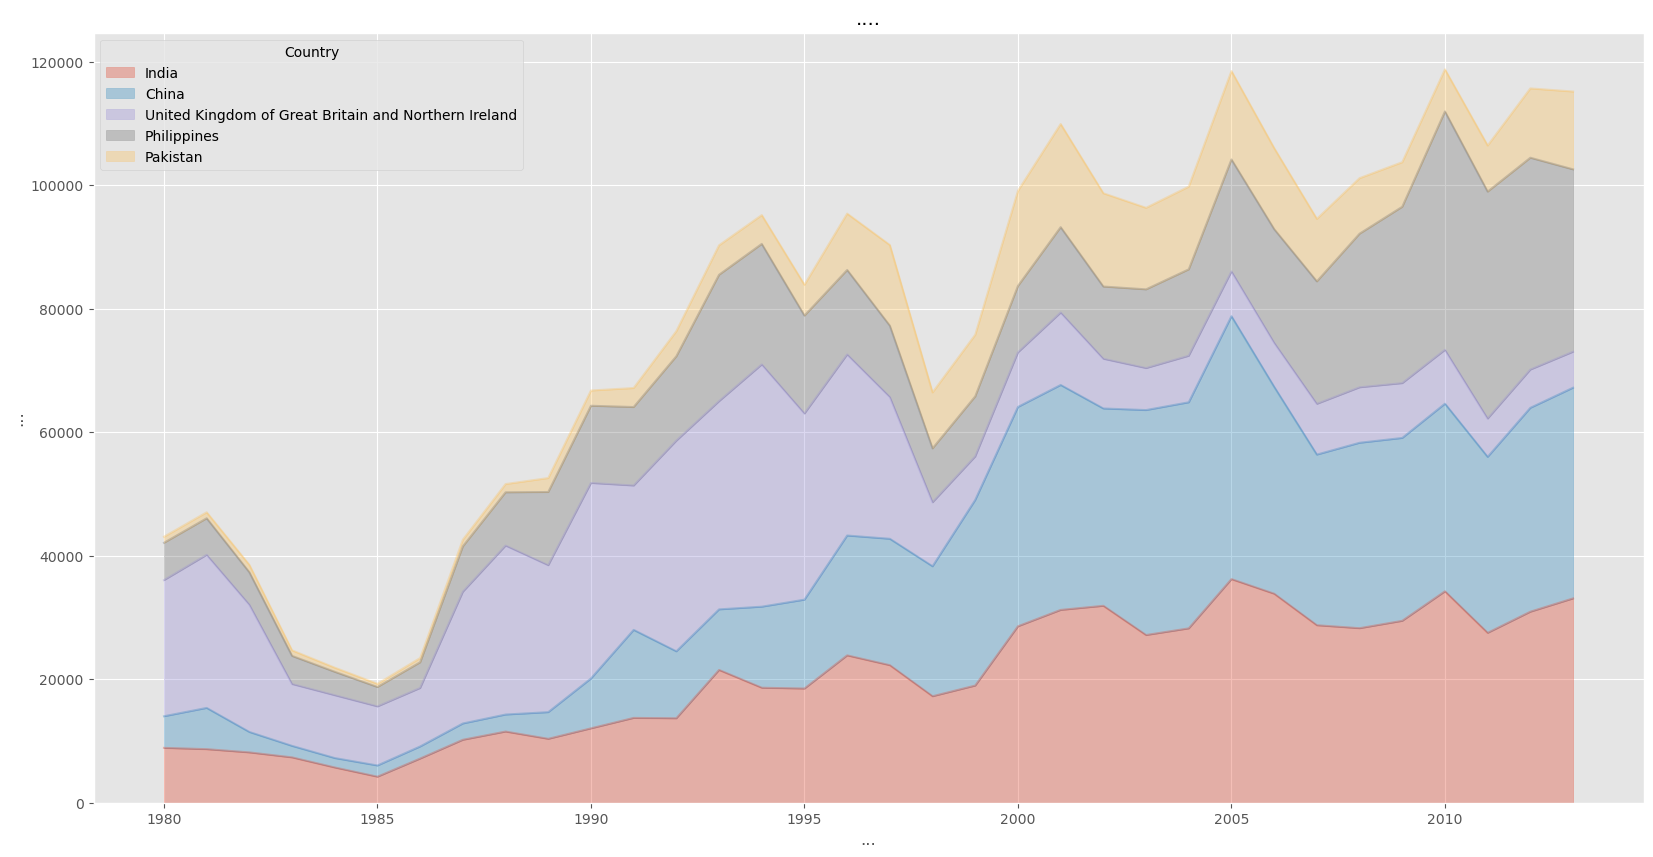

In [14]:
#option 1 - this is what we have been using so far
df_top5.plot(kind = 'area', alpha = 0.35, figsize = (20, 10))
plt.title('....')
plt.xlabel('...')
plt.ylabel('...')

plt.show()

##### Option 2 - Artist Layer (Object oriented method) - useing an `Axes` instance from matplotlib (preferred)

We can use an `Axes` instance of our current plot and store it in a variable (ex - `ax`). We can add more elements by adding methods with a little change in syntax (by adding `set` to the previous methods). for example let's use `ax.set_title()` instead of `plt.title()` to add title. or `ax.set_xlabel` instead of `plt.xlabel` to add the x-axis.

This option is more tranperent and flexible to use for advanced plots (esppecially when working with multiple plots)

In [15]:
#option 2 - prefered option with more flexibility
ax = df_top5.plot(kind = 'area', alpha = 0.35, figsize = (20, 10))

ax.set_title('....')
ax.set_xlabel('...')
ax.set_ylabel('....')

Text(0, 0.5, '....')

Question - Use the scripting layer (option 1) to create a stacked area plot of the 5 countries that contributed the least to immigration to Canad from 1980 to 2013. Use a transperancy value of 0.45

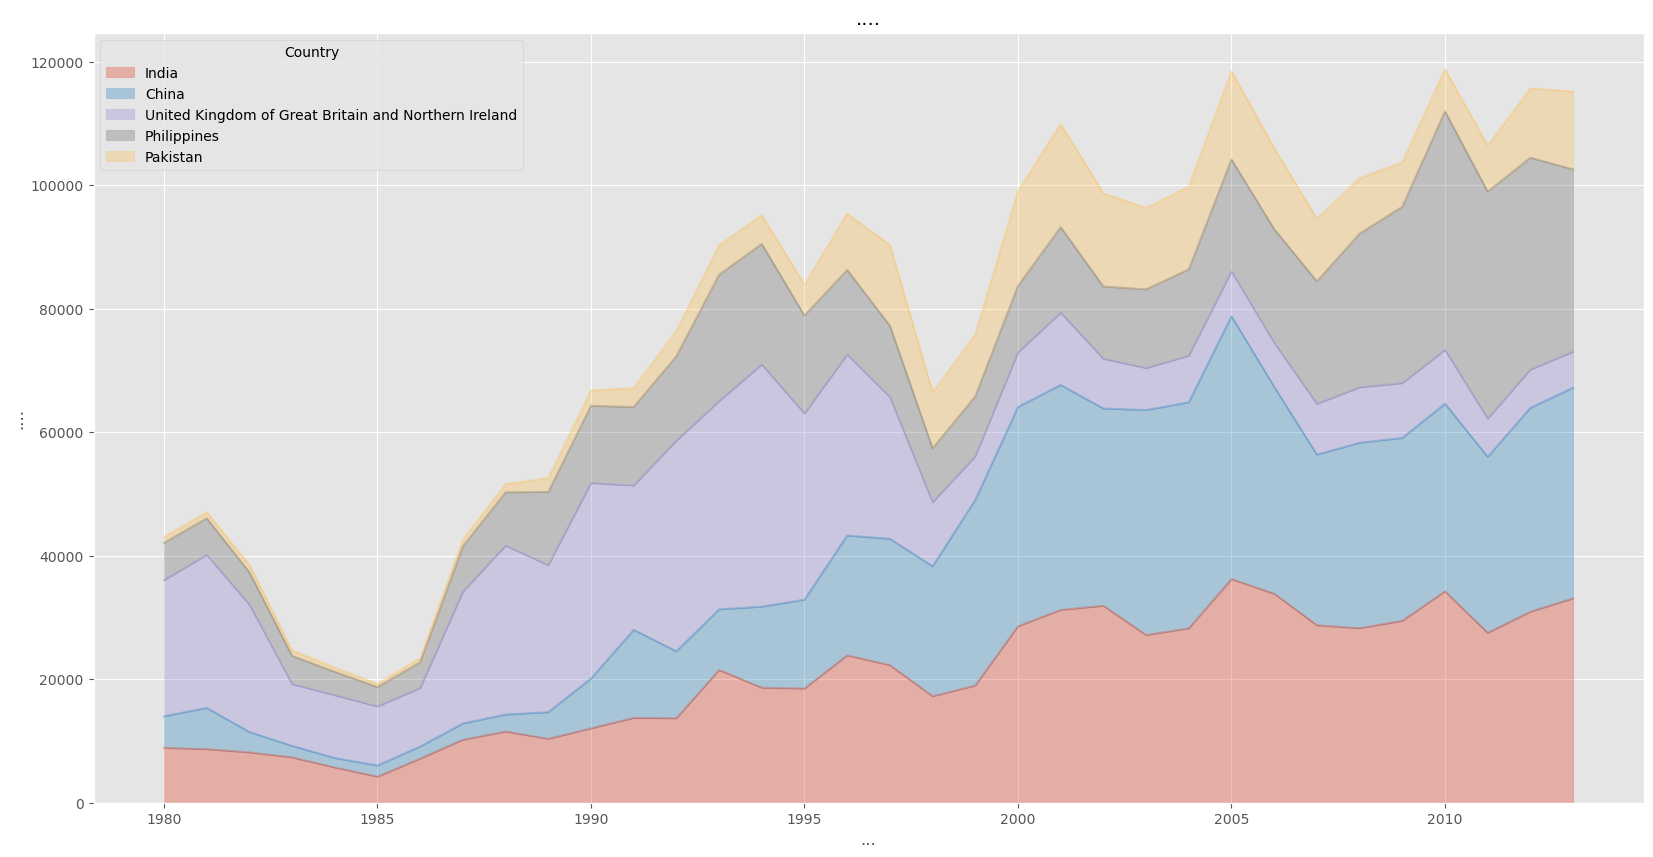

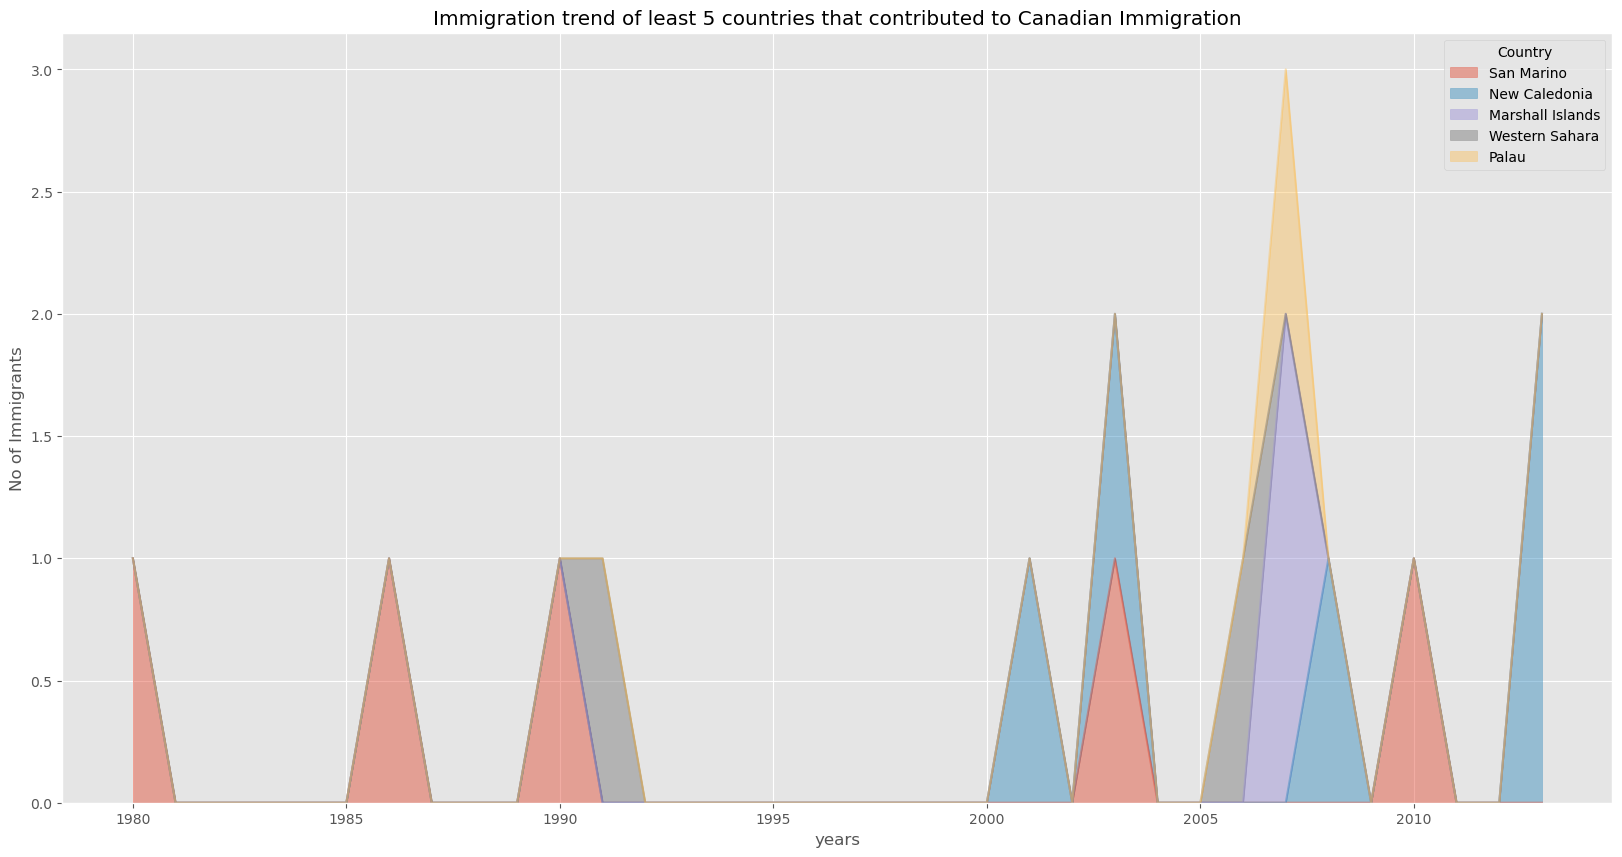

In [16]:
df_least5 = df.tail(5)
df_least5 = df_least5[years].transpose()

df_least5.head()

df_least5.index = df_least5.index.map(int)

df_least5.plot(kind = 'area', alpha = 0.45, figsize = (20,10))

plt.title('Immigration trend of least 5 countries that contributed to Canadian Immigration')
plt.xlabel('years')
plt.ylabel('No of Immigrants')

plt.show()

Question - Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use tranparency values of 0.55

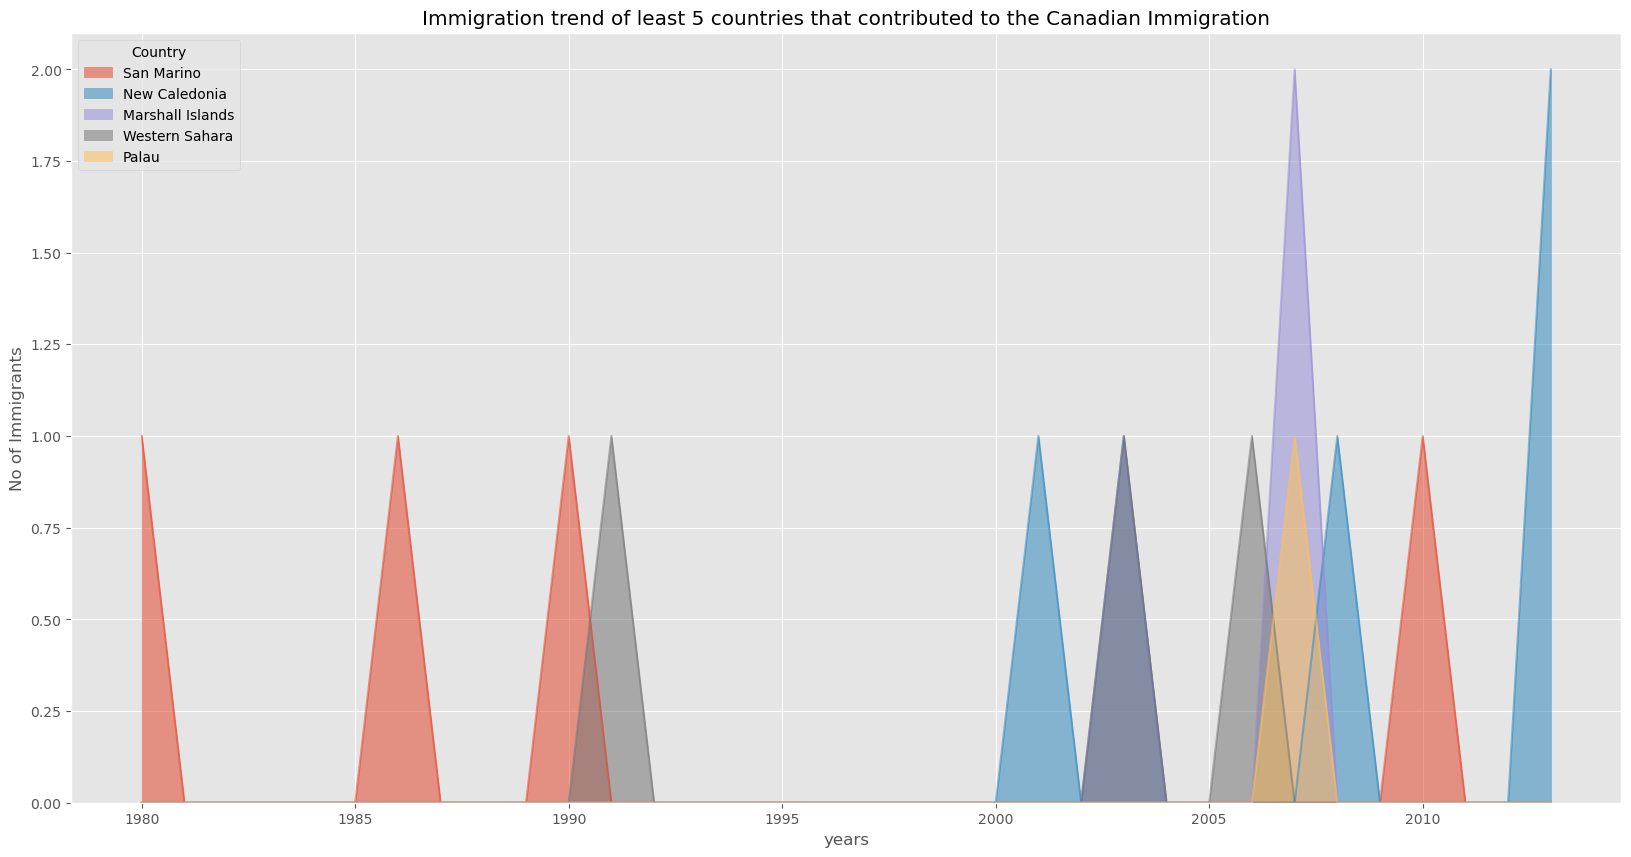

In [17]:
ax = df_least5.plot(kind = 'area', alpha = 0.55, stacked = False, figsize = (20, 10))

ax.set_title('Immigration trend of least 5 countries that contributed to the Canadian Immigration')
ax.set_xlabel('years')
ax.set_ylabel('No of Immigrants')

plt.show()

## Histograms

A histogram is a way of representin the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our data set to a bin, qand then counts the no of data points that have been assigned to each bin. So the y-axis is the frequency or the no of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [18]:
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [19]:
#np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) #frequency count
print(bin_edges) #bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default the histogram method breaks up the data into 10 bins. the fig below summarizws the bin ranges and the frequency distribution of immigration in 2013. We canb see that in 2013.

- 178 countries comtributed between 0 to 3412.9 immigrants
- 11 countries contributed between 3412.9 to 6825.8 immigrants
- 1 country contributed between 6285.8 to 10238.7 imigrants and so on.....

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">

We can easily graph this dristibution by passing `kind=hist` to `plot()`.

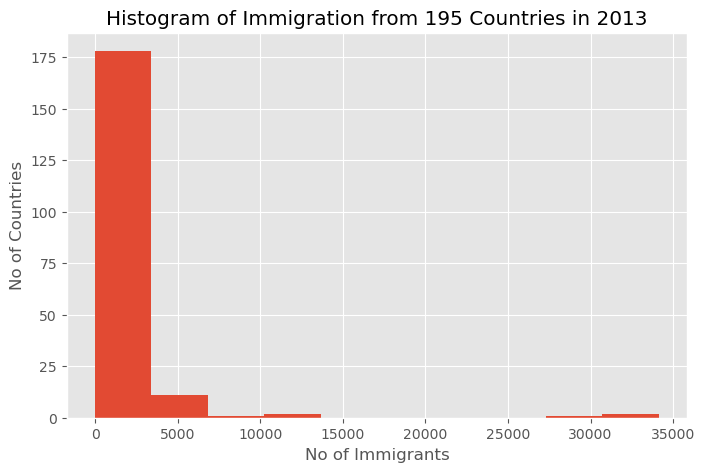

In [20]:
df['2013'].plot(kind = 'hist', figsize = (8,5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('No of Immigrants')
plt.ylabel('No of Countries')

plt.show()

In the above plot, the x-asis represents the population range of the immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the above mentioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:

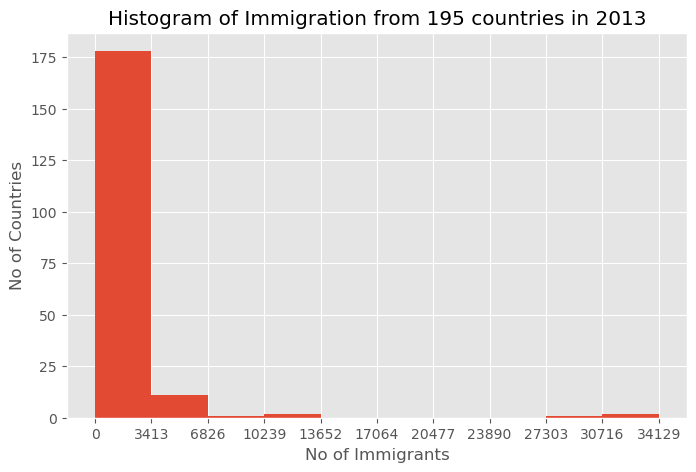

In [21]:
#'bin-edges' is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind = 'hist', figsize = (8, 5), xticks = bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.xlabel('No of Immigrants')
plt.ylabel('No of Countries')

plt.show()

Side note - We could use `df['2013'].plot.hist()`, instead. In fact, throughout this project, using `some-data.plot(kind = 'type_plot',....)` is equivalent to `some-data.plot.type_plot(...0`. That is, passing the type of the plot as argument or method behaves the same

We can also plot multiple histograms on the same plo. For esxample, let's try to answer following questions using a histogram

###### Question
What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [22]:
#let's quickly view the dataset
df.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [23]:
#generate histogram
df.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

<Axes: ylabel='Frequency'>

This semms not working properly, we'll often come across situations like this when creating plots. the solution often lies in how the underlying data set is structured.

Instead of plotting the polulation frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

This can easily fitted first transporting the dataset, and then plotting as shown below

In [24]:
#transpose dataframe
df_t = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


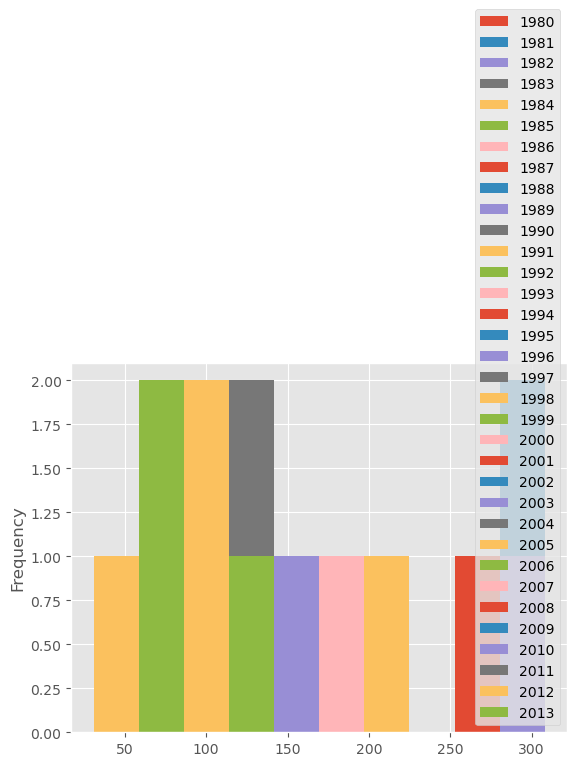

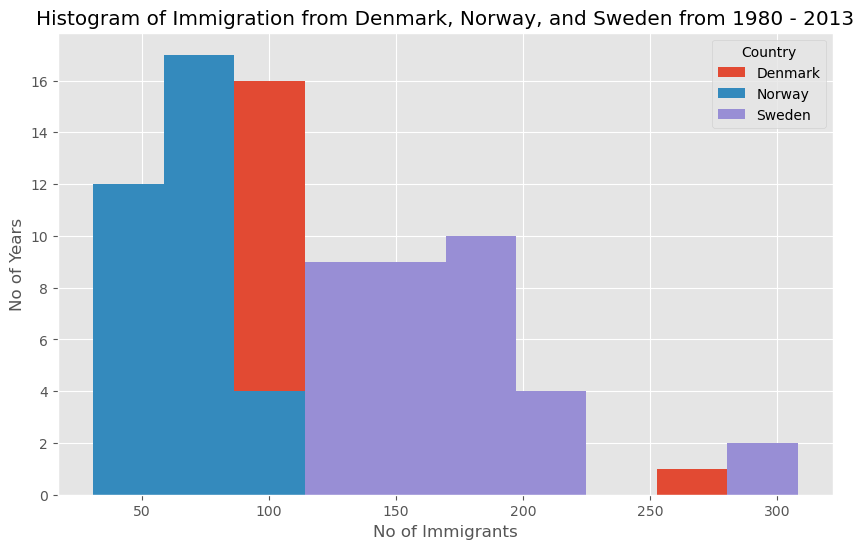

In [25]:
df_t.plot(kind = 'hist', figsize = (10,6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.xlabel('No of Immigrants')
plt.ylabel('No of Years')

plt.show()

let's make a few modifications to improve the impact and aesthetics of the above plot
- increase the bin size to 15 by passing in `bins` parameter
- set transperancy to 605 by passing in `alpha` parameter
- label the x-axis by passing in `x-label` parameter
- change the color of the plots by passing in `color` parameter

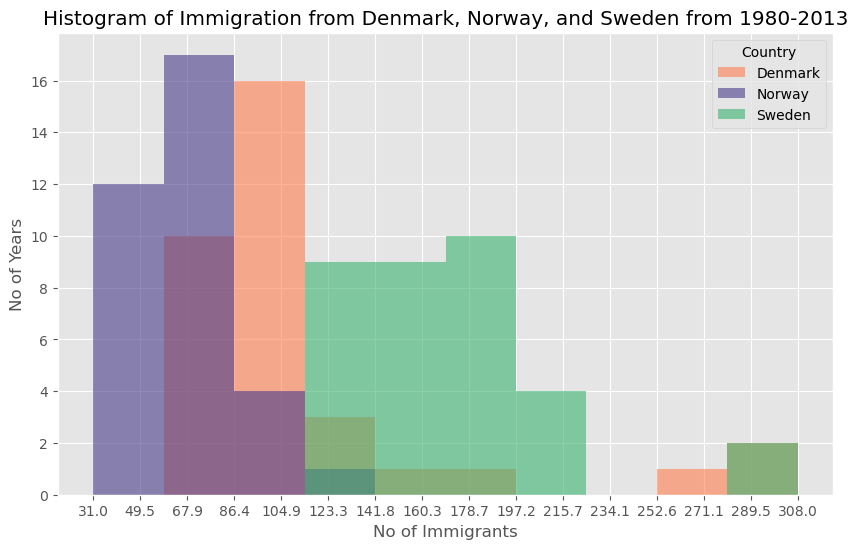

In [26]:
#let's get the x-tck values
count, bin_edges = np.histogram(df_t, 15)

#un-stacked histogram
df_t.plot(kind = 'hist', figsize = (10,6), alpha = 0.6, xticks = bin_edges, color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980-2013')
plt.xlabel('No of Immigrants')
plt.ylabel('No of Years')

plt.show()

Tip - For a full list of colors available in Matplotlib, run the following code

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```

If we don't want the plots to overlap each other, we can stack them using the `stacked` parameter. Let's also adjust the min and maz x-asis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` parameter, as shown below

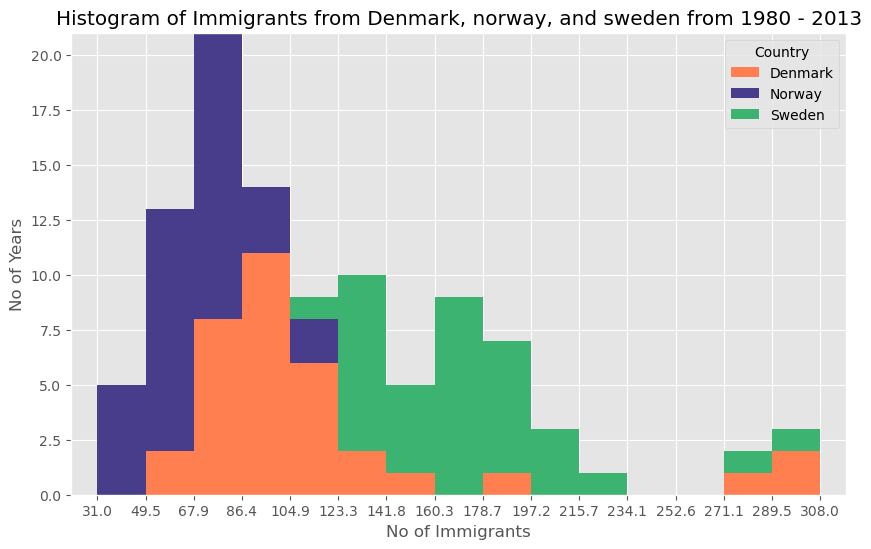

In [27]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #first bin value is 31.0, adding a buffer of 10 for asthetic purposes
xmax = bin_edges[-1] +10   #last bin value is 308.0, adding buffer of 10 for asthetic purposes

#stacked histogram
df_t.plot(kind = 'hist', figsize = (10,6), bins = 15, xticks = bin_edges, color = ['coral', 'darkslateblue', 'mediumseagreen'], stacked = True, xlim = (xmin, xmax))

plt.title('Histogram of Immigrants from Denmark, norway, and sweden from 1980 - 2013')
plt.xlabel('No of Immigrants')
plt.ylabel('No of Years')

plt.show()

Question - Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013. Use an overlapping plot with 15 bins and a transperancy value of 0.35

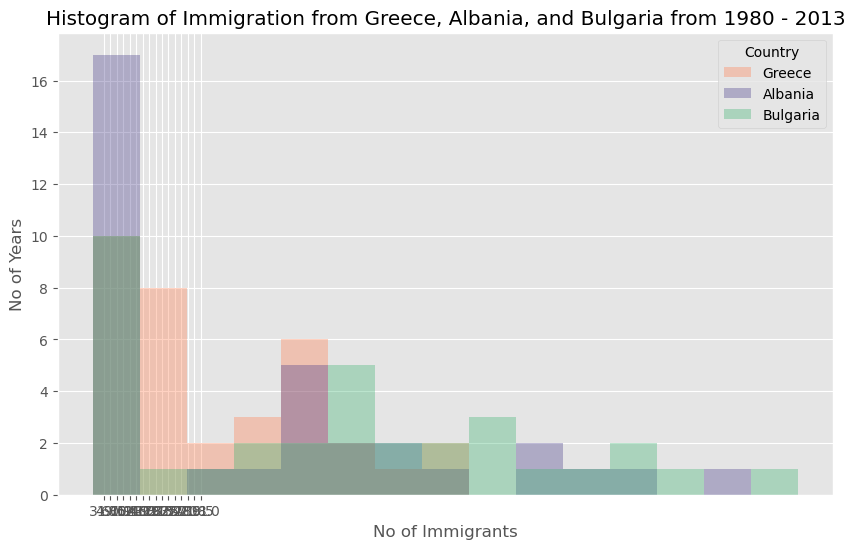

In [28]:
#let's create a dataframe of countries of intrest (df_cof)
df_cof = df.loc[['Greece', 'Albania', 'Bulgaria'], years]

df_cof = df_cof.transpose()

df_cof.plot(kind = 'hist', figsize = (10,6), bins = 15, alpha = 0.35, xticks = bin_edges, color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.xlabel('No of Immigrants')
plt.ylabel('No of Years')

plt.show()

## Bar charts (Dataframe)

A bar chart/plot is a way of representing data where the length of the bar represents the magnitude/size of the feature/variable. Bar graphs usually represents numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one to two arguments via `kind` parameter in `plot()`.

- `kind = bar` creates a vertical bar plot
- `kind = barh` creates a horizontal bar plot

#### Vertical bar plot

In vertical bar graphs, the x-axis is used for labelling, and gthe length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particullarly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Iceland's financial crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest expeienced by ny country in economic depression in 2008-2011 and significant political unrest.

Question - Let's compare the number of Icelandic immigrants (country = Iceland) to Canada from 1980 to 2013.

In [29]:
df_iceland = df.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

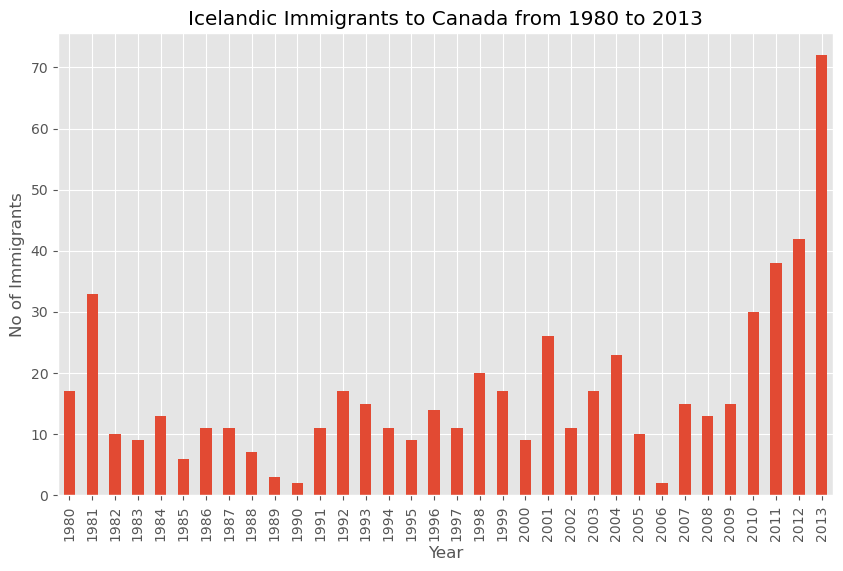

In [30]:
#step 2 - plot data
df_iceland.plot(kind = 'bar', figsize = (10, 6))

plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('No of Immigrants')

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis, the number of immigrants to Canada statrted increasing rapidly after 2008

let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters.

- `s` : str, the text of annotation.
- `xy` : Tuple specifiying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coorinates system that xy is given in - 'data' uses the coordinate syatem of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
- `arrowstyle`; specifies the arrow style, `->` is standard arrow.
- `connectionstyle`: Specifies the connection tye. `arc3` is a straight line.
- `color`: specifies color of arrow.
-`lw`: Specifies the line width

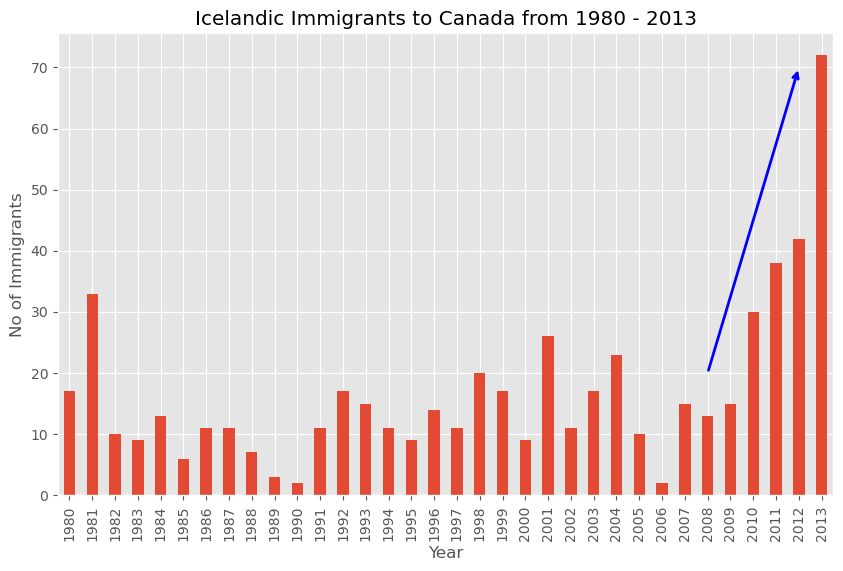

In [32]:
df_iceland.plot(kind = 'bar', figsize = (10, 6), rot = 90)  #rotate the xticks (labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('No of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 - 2013')

#Annotate arrow
plt.annotate('', #s:str. will leave it blank for no text
             xy = (32, 70), #place head of the arrow at point (year 2012, pop 70)
             xytext = (28, 20), #place base of the arrow point at(year 2008, pop 20)
             xycoords = 'data', #will use the coordinate system of the object being annotated
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2)
            )
plt.show()

let's also annotate a text to go over the arrow. W ewill pass in the following additional parameters.

- `rotation`: rotation angle of text in degrees (counter clockwise)
-  `va`: vertical alignment of text ['center' | 'top' | 'bottom' | 'baseline']
-  `ha`: horizontal alignment of text ['center | 'right' | 'left']

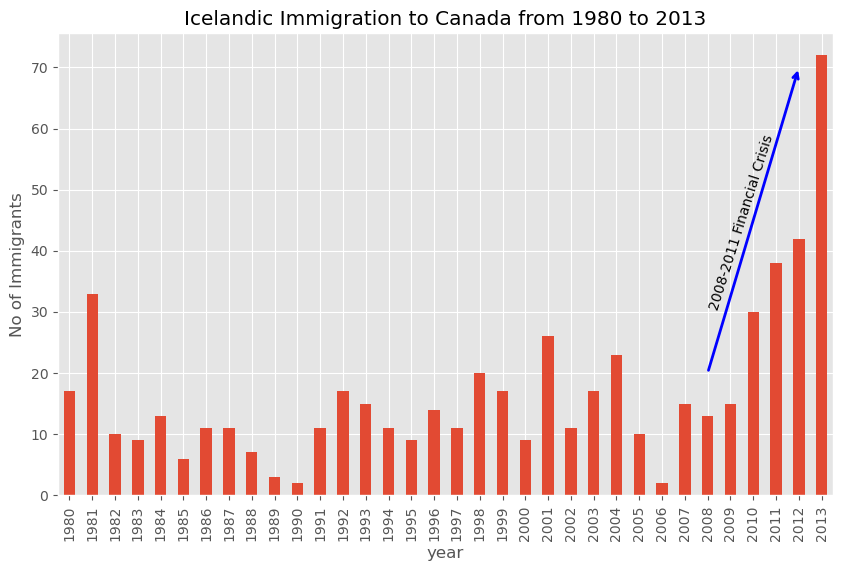

In [33]:
df_iceland.plot(kind = 'bar', figsize = (10,6), rot = 90)

plt.title('Icelandic Immigration to Canada from 1980 to 2013')
plt.xlabel('year')
plt.ylabel('No of Immigrants')

#annotate arrow
plt.annotate('', xy = (32,70), xytext = (28,20), xycoords = 'data', arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

#Annotate text
plt.annotate('2008-2011 Financial Crisis', xy = (28,30), rotation = 72.5, va = 'bottom', ha = 'left')

plt.show()
             

### Horizontal Bar plots

Sometimes it is more practical to represent the data horizontally, especially if we need more room for labelling the bars. In horizontal bar braphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As we will see, there is more room on the y-axis to label categorical variables.

Question - Using the scripting later and the `df` dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrants county.

In [34]:
df.sort_values('Total', ascending = True, inplace = True)
df_top15 = df['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Step 2: Plot data
1. Use `kind = barh` to generate a bar chart with horizontl bars.
2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
3. Loop through the countries and annotate the immigration population using the anotate function of the scripting interface.
    

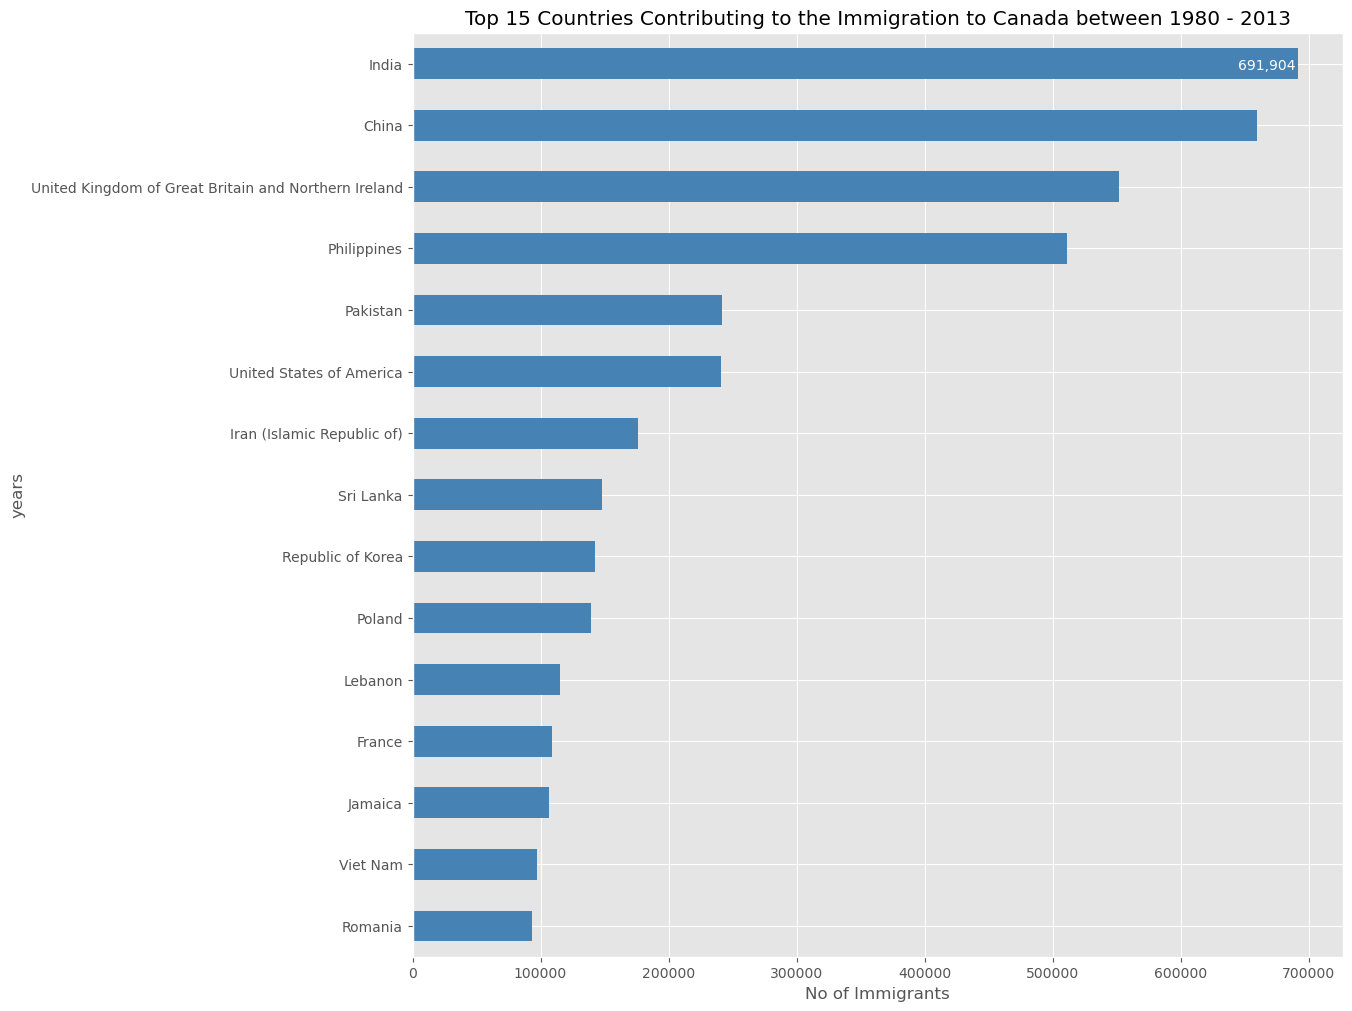

In [35]:
df_top15.plot(kind = 'barh', figsize = (12,12), color = 'steelblue')

plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')
plt.xlabel('No of Immigrants')
plt.ylabel('years')

##annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ',') #format int with commas

#place text at the end of bar (substracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value-47000, index - 0.10), color = 'white')

plt.show()

## Author

#### Dudekula Abid Hussain